# Car Brand Classification using the Stanford Cars Dataset

This is a project for classifying the car brand through images. The dataset used for this project named Stanford Cars dataset (https://ai.stanford.edu/~jkrause/cars/car_dataset.html0).

## Import Libraries and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/DimitriosGagatsis_MScDataScience/12.DL_ImageVideoProcessing/car_data

/content/drive/MyDrive/DimitriosGagatsis_MScDataScience/12.DL_ImageVideoProcessing/car_data


In [3]:
%ll

total 8
drwx------ 2 root 4096 Nov 14 14:47 test/
drwx------ 2 root 4096 Nov 14 14:47 train/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [5]:
%pwd

'/content/drive/MyDrive/DimitriosGagatsis_MScDataScience/12.DL_ImageVideoProcessing/car_data'

In [6]:
train_dir = "/content/drive/MyDrive/DimitriosGagatsis_MScDataScience/12.DL_ImageVideoProcessing/car_data/train"
valid_dir = "/content/drive/MyDrive/DimitriosGagatsis_MScDataScience/12.DL_ImageVideoProcessing/car_data/test"

image_size = 224
batch_size = 32
num_workers = 4

In [7]:
# Show images from train directory
train_images = os.listdir(train_dir)
print("Number of images in train directory: ", len(train_images))
print("Sample images from train directory: ", train_images[:5])

Number of images in train directory:  196
Sample images from train directory:  ['GMC Canyon Extended Cab 2012', 'Dodge Durango SUV 2012', 'Dodge Dakota Crew Cab 2010', 'Hyundai Santa Fe SUV 2012', 'Chevrolet Silverado 1500 Extended Cab 2012']


In [8]:
# Show images from valid directory
valid_images = os.listdir(valid_dir)
print("Number of images in valid directory: ", len(valid_images))
print("Sample images from valid directory: ", valid_images[:5])


Number of images in valid directory:  196
Sample images from valid directory:  ['Chevrolet Silverado 2500HD Regular Cab 2012', 'Dodge Dakota Crew Cab 2010', 'Jeep Compass SUV 2012', 'Chevrolet Silverado 1500 Extended Cab 2012', 'Hyundai Santa Fe SUV 2012']


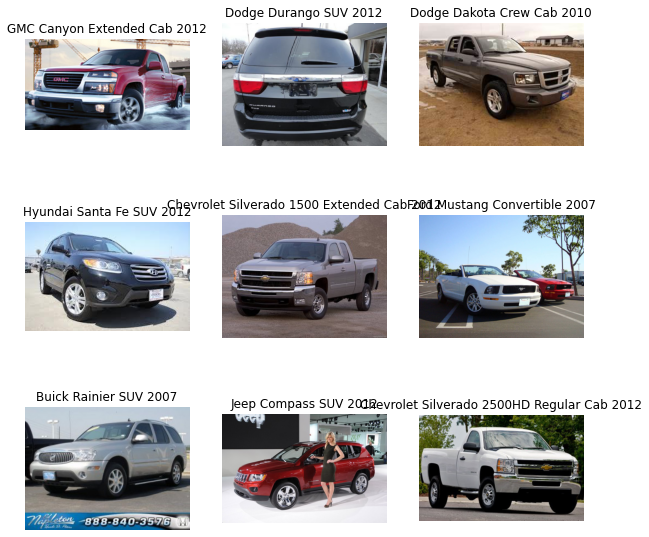

In [9]:
# Plot training images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(train_dir + "/" + train_images[i] + "/" + os.listdir(train_dir + "/" + train_images[i])[0])
    plt.imshow(img)
    plt.title(train_images[i])
    plt.axis("off")

['Audi 100 Wagon 1994', 'Audi TT RS Coupe 2012', 'Audi 100 Sedan 1994', 'Audi R8 Coupe 2012', 'Audi V8 Sedan 1994', 'Audi RS 4 Convertible 2008', 'Audi TT Hatchback 2011', 'Audi A5 Coupe 2012', 'Audi S6 Sedan 2011', 'Audi TTS Coupe 2012', 'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012', 'Audi S4 Sedan 2007', 'Audi S5 Coupe 2012']


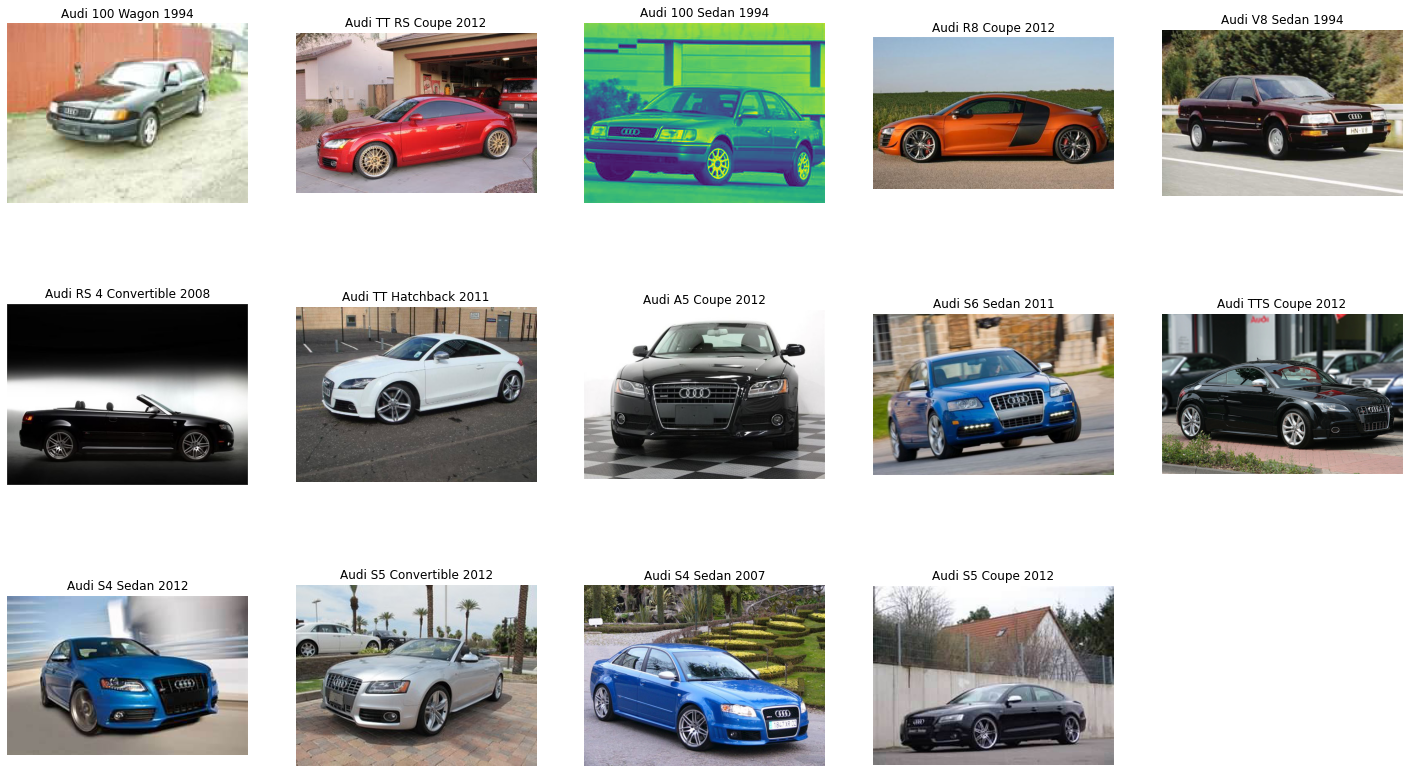

In [10]:
# Show specific brand images
def show_brand_images(brand_name):
    """ Function to find all the models of a 
    given car brand-name and show their images."""
    brand_name = str(brand_name)
    # Find all the models with a given brand name
    car = []
    for i in range(len(train_images)):
        if brand_name in train_images[i].lower():
            # print(train_images[i])
            # car = train_images[i]
            car.append(train_images[i])
    print(car)
    # Show one image from every class
    plt.figure(figsize=(25, 25))
    for i in range(len(car)):
        plt.subplot(5, 5, i+1)
        img = plt.imread(train_dir + "/" + car[i] + "/" + os.listdir(train_dir + "/" + car[i])[0])
        plt.imshow(img)
        plt.title(car[i])
        plt.axis("off")

show_brand_images("audi")

## Data Augmentation

In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [12]:
# Required constants.
image_size = 224 # Image size of resize when applying transforms.
batch_size = 32
num_workers = 4 # Number of parallel processes for data preparation.

In [13]:
# Training Transforms
def get_train_transform(image_size):
  train_transform = transforms.Compose([
      transforms.Resize((image_size, image_size)),
      transforms.RandomHorizontalFlip(p=0.5),
      transforms.RandomRotation(35),
      transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),
      transforms.RandomGrayscale(p=0.5),
      transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
      transforms.RandomPosterize(bits=2, p=0.5),
      transforms.ToTensor(),
      transforms.Normalize(
          mean=[0.485, 0.456, 0.406],
          std=[0.229, 0.224, 0.225]
          )
  ])
  return train_transform


def get_valid_transform(image_size):
    valid_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ])
    return valid_transform


def get_datasets():
    """
    Function to prepare the Datasets.
    Returns the training and validation datasets along 
    with the class names.
    """
    dataset_train = datasets.ImageFolder(
        train_dir, 
        transform=(get_train_transform(image_size))
    )
    dataset_valid = datasets.ImageFolder(
        valid_dir, 
        transform=(get_valid_transform(image_size))
    )
    return dataset_train, dataset_valid, dataset_train.classes



def get_data_loaders(dataset_train, dataset_valid):
    """
    Input: the training and validation data.
    Returns the training and validation data loaders.
    """
    train_loader = DataLoader(
        dataset_train, batch_size=batch_size, 
        shuffle=True, num_workers=num_workers
    )
    valid_loader = DataLoader(
        dataset_valid, batch_size=batch_size, 
        shuffle=False, num_workers=num_workers
    )
    return train_loader, valid_loader 

In [14]:
# Load the training and validation datasets.
dataset_train, dataset_valid, dataset_classes = get_datasets()

In [15]:
print(f"[INFO]: Number of training images: {len(dataset_train)}")
print(f"[INFO]: Number of validation images: {len(dataset_valid)}")

[INFO]: Number of training images: 8144
[INFO]: Number of validation images: 8048


In [16]:
# Load the training and validation data loaders
train_loader, valid_loader = get_data_loaders(dataset_train, dataset_valid)

In [17]:
print(f"[INFO]: Number of training images: {len(train_loader)}")
print(f"[INFO]: Number of validation images: {len(valid_loader)}")

[INFO]: Number of training images: 255
[INFO]: Number of validation images: 252


## Get Models

In [18]:
import torch.nn as nn
from torchvision import models

def build_model(pretrained=True, fine_tune=True, num_classes=10):
  if pretrained:
    print("Loading pre-trained weights")
  else:
    print("Not loading pre-trained weights")
  model = models.efficientnet_b0(pretrained=pretrained)

  if fine_tune:
    print("Fine-tuning the model")
    for param in model.parameters():
      param.requires_grad = True
  elif not fine_tune:
    print("Not fine-tuning the model")
    for param in model.parameters():
      param.requires_grad = False

  # Classification Head
  model.classifier[1] = nn.Linear(in_features=1280, out_features=num_classes)
  return model


## Train the model

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

In [20]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}")

Computation device: cuda


In [21]:
# Training the model
from tqdm.auto import tqdm

def train(model, trainloader, optimizer, criterion):
  model.train()
  print("Training model...")
  train_running_loss = 0.0
  train_running_correct = 0
  counter = 0

  for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
      counter += 1
      image, labels = data
      image = image.to(device)
      labels = labels.to(device)
      optimizer.zero_grad()
      # Forward pass.
      outputs = model(image)
      # Calculate the loss.
      loss = criterion(outputs, labels)
      train_running_loss += loss.item()
      # Calculate the accuracy.
      _, preds = torch.max(outputs.data, 1)
      train_running_correct += (preds == labels).sum().item()
      # Backpropagation.
      loss.backward()
      # Update the weights.
      optimizer.step()

  # Loss and accuracy for the complete epoch.
  epoch_loss = train_running_loss / counter
  epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
  return epoch_loss, epoch_acc 

In [22]:
# Validation of the model
def validate(model, testloader, criterion, class_names):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1
            
            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # Forward pass.
            outputs = model(image)
            # Calculate the loss.
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # Calculate the accuracy.
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()

    # Loss and accuracy for the complete epoch.
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))
    return epoch_loss, epoch_acc

In [23]:
# Load the model.
model = build_model(
    pretrained=True,
    fine_tune=True, 
    num_classes=len(dataset_classes)
).to(device)


# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model.parameters())

Loading pre-trained weights


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth


  0%|          | 0.00/20.5M [00:00<?, ?B/s]

Fine-tuning the model


In [24]:
total_params = sum(p.numel() for p in model.parameters())

In [25]:
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
        p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

4,258,624 total parameters.
4,258,624 training parameters.


In [26]:
# Optimizer. # EXPERIMENTS WITH OTHER OPTIMISERS AND OTHER LEARNING RATES
optimizer = optim.Adam(model.parameters(), lr=0.0001)
# Loss function.
criterion = nn.CrossEntropyLoss()

In [27]:
# Lists to keep track of losses and accuracies.
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []

In [28]:
import time
epochs = 10

# Start the training.

for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_loader, 
                                            optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = validate(model, valid_loader,  
                                                criterion, dataset_classes)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)
    time.sleep(2)

[INFO]: Epoch 1 of 10
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Training loss: 5.254, training acc: 1.093
Validation loss: 5.131, validation acc: 3.181
--------------------------------------------------
[INFO]: Epoch 2 of 10
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Training loss: 4.915, training acc: 5.292
Validation loss: 4.248, validation acc: 14.227
--------------------------------------------------
[INFO]: Epoch 3 of 10
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Training loss: 4.153, training acc: 14.268
Validation loss: 3.287, validation acc: 30.629
--------------------------------------------------
[INFO]: Epoch 4 of 10
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Training loss: 3.407, training acc: 25.896
Validation loss: 2.488, validation acc: 45.167
--------------------------------------------------
[INFO]: Epoch 5 of 10
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Training loss: 2.825, training acc: 36.849
Validation loss: 1.958, validation acc: 55.629
--------------------------------------------------
[INFO]: Epoch 6 of 10
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Training loss: 2.380, training acc: 45.395
Validation loss: 1.638, validation acc: 59.841
--------------------------------------------------
[INFO]: Epoch 7 of 10
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Training loss: 2.059, training acc: 51.437
Validation loss: 1.376, validation acc: 66.153
--------------------------------------------------
[INFO]: Epoch 8 of 10
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Training loss: 1.776, training acc: 57.822
Validation loss: 1.189, validation acc: 70.229
--------------------------------------------------
[INFO]: Epoch 9 of 10
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Training loss: 1.571, training acc: 61.726
Validation loss: 1.056, validation acc: 72.913
--------------------------------------------------
[INFO]: Epoch 10 of 10
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Training loss: 1.404, training acc: 65.349
Validation loss: 0.970, validation acc: 74.615
--------------------------------------------------


In [31]:
# utlis.py
import torch
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

def save_model(epochs, model, optimizer, criterion):
    torch.save({
        'epoch': epochs,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': criterion,
    }, 'model.pth')

def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # Accuracy plots.
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f"accuracy.png")
    
    # Loss plots.
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f"loss.png")

TRAINING COMPLETE


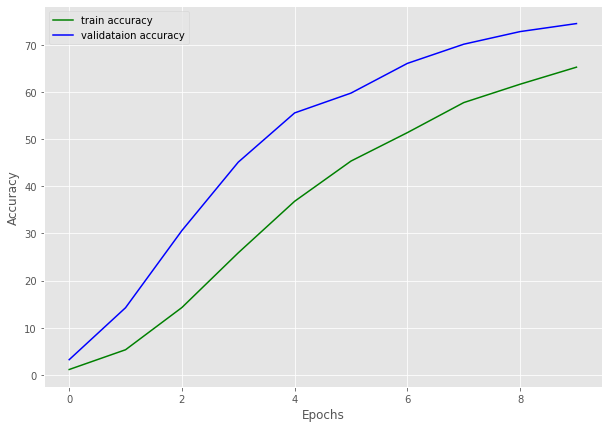

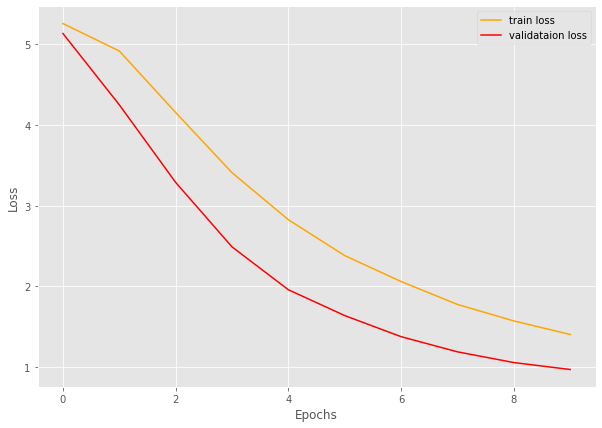

In [32]:
# Save the trained model weights.
save_model(epochs, model, optimizer, criterion)
# Save the loss and accuracy plots.
save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')